In [6]:
library(oce, gsw)
cruise_dir = 'C:/Users/wand/Box Sync/Physics/PhD_work/kitimat_data/cruise_data'

In [119]:
cruise_ids = list.files(cruise_dir)
print(cruise_ids[1])
print(cruise_ids)
cruise_1 = cruise_ids[1]
ctd_path = file.path(cruise_dir, cruise_ids[1], 'CTD')
ctd_files = list.files(ctd_path)
print(ctd_files)
file1 = file.path(ctd_path,ctd_files[1] )

[1] "2013-50"
[1] "2013-50" "2014-15" "2014-20" "2014-59" "2015-03" "2015-46" "2015-54"
 [1] "2013-50-0005.ctd" "2013-50-0006.ctd" "2013-50-0015.ctd" "2013-50-0018.ctd"
 [5] "2013-50-0019.ctd" "2013-50-0021.ctd" "2013-50-0023.ctd" "2013-50-0024.ctd"
 [9] "2013-50-0025.ctd" "2013-50-0026.ctd" "2013-50-0027.ctd" "2013-50-0028.ctd"
[13] "2013-50-0030.ctd" "2013-50-0031.ctd" "2013-50-0032.ctd" "2013-50-0033.ctd"
[17] "2013-50-0034.ctd" "2013-50-0035.ctd" "2013-50-0036.ctd" "2013-50-0037.ctd"
[21] "2013-50-0038.ctd" "2013-50-0039.ctd" "2013-50-0040.ctd" "2013-50-0041.ctd"
[25] "2013-50-0042.ctd"


[1] 52.9
[[1]]
[1] ""          "LONGITUDE" ":"         "129"       "23.96000"  "W"        
[7] "!"         "(deg"      "min)"     

[1] -129.3993
[1] 255
[1] "QD01"
[1] 9
[1] "Pressure"                  "Temperature:Primary"      
[3] "Transmissivity"            "Fluorescence:URU:Seapoint"
[5] "PAR"                       "Salinity:T0:C0"           
[7] "Oxygen:Dissolved:SBE"      "Oxygen:Dissolved:SBE"     
[9] "Number_of_bin_records"    


Loading required package: testthat


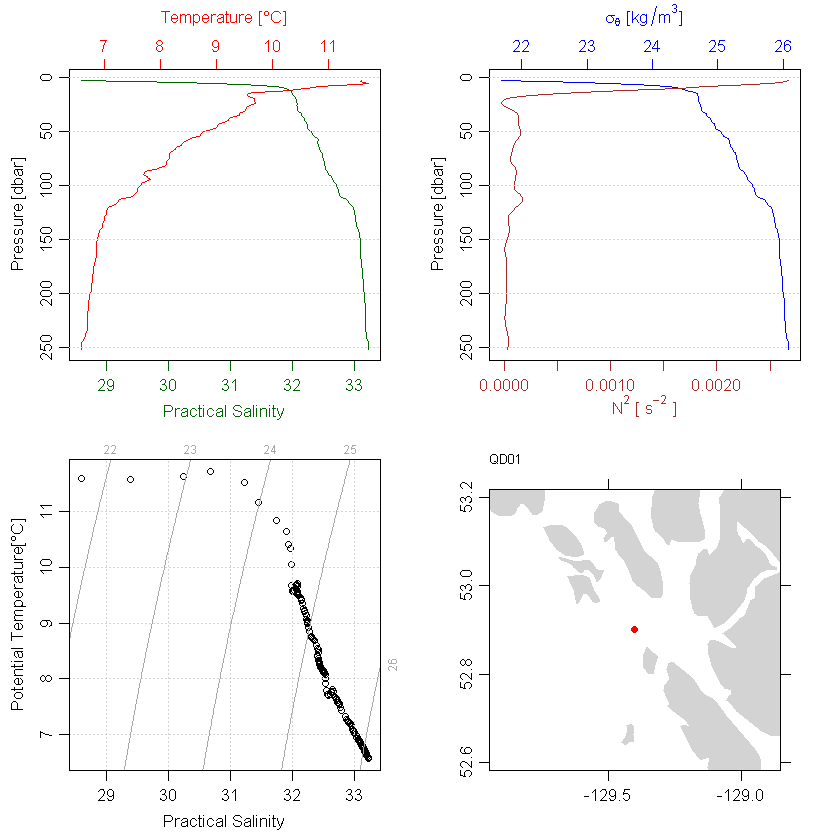

In [120]:
mydata = read.csv(file1, header=FALSE, skip=0, sep="\t")

a = readLines(file1)
b = grep('NUMBER OF CHANNELS', a)
strs = strsplit(a[b], ": ")
num_of_c = as.numeric(strs[[1]][2])

lat_ln = grep('LATITUDE', a)
lon_ln = grep('LONGITUDE', a)

lats = strsplit(a[lat_ln], "[, ]+")
lat = as.numeric(lats[[1]][4]) + as.numeric(lats[[1]][5])/60.
print(lat)

lons = strsplit(a[lon_ln], "[, ]+")
print(lons)
lon = - (as.numeric(lons[[1]][4]) + as.numeric(lons[[1]][5])/60.)
print(lon)

dep_ln = grep('WATER DEPTH', a)
depth = as.numeric(strsplit(a[dep_ln], "[\t: A-Z]+")[[1]][2])
print(depth)

stn_ln = grep('STATION', a)
stn = strsplit(a[stn_ln], "[: ]+")[[1]][3]
print(stn)

strs = strsplit(a[b], ": ")
num_of_c = as.numeric(strs[[1]][2])
print(num_of_c)


header_endln = grep('END OF HEADER', a)
header2 <- scan(file1, skip=15, nlines=num_of_c, what=list('a','b','c','d','e'), sep="")[[2]]
print(header2)



ctd1 <- read.table(file1, header=FALSE, skip=header_endln, col.names=header2, sep='')



ctd2 = as.ctd(salinity=ctd1$Salinity.T0.C0,
              temperature=ctd1$Temperature.Primary, 
              pressure=ctd1$Pressure, 
              oxygen=ctd1$Oxygen.Dissolved.SBE,
              longitude=lon, latitude=lat,waterDepth=depth, cruise=cruise_ids[1],
              station=stn)
plot(ctd2)

                    